In [2]:
# Scikit Learn Notes
# Youtube: https://www.youtube.com/playlist?list=PLXO45tsB95cI7ZleLM5i3XXhhe9YmVrRO

import tensorflow as tf
#print(tf.__version__)
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
### Call algorithm
iris = datasets.load_iris()
iris_X=iris.data
iris_Y=iris.target

#print(iris_X[:2,:]) # we only take the first two features
#print(iris_Y)

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(iris_X, iris_Y, test_size=0.3)
#print(Y_train)

In [5]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
print(knn.predict(X_test))
print(Y_test)

[2 1 2 1 2 1 1 2 1 1 0 1 1 1 2 2 2 1 0 1 2 2 0 0 1 1 1 1 0 1 2 1 2 0 0 1 0
 0 2 2 2 2 0 0 1]
[2 1 2 1 2 1 1 2 1 1 0 1 1 1 2 2 2 1 0 1 2 2 0 0 1 1 1 1 0 1 2 1 2 0 0 1 0
 0 2 2 2 1 0 0 1]


In [7]:
### Datasets
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [8]:
loaded_data = datasets.load_boston()
data_X = loaded_data.data
data_Y = loaded_data.target #always this format for x & y

model = LinearRegression()  #Define Model
model.fit(data_X,data_Y) #learn

print(model.predict(data_X[:4,:]))
print(data_Y[:4])

[30.00384338 25.02556238 30.56759672 28.60703649]
[24.  21.6 34.7 33.4]


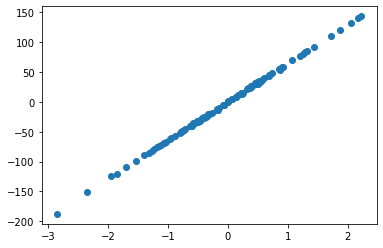

In [9]:
#make up some data
import matplotlib.pyplot as plt
X,Y = datasets.make_regression(n_samples=100, n_features=1, n_targets=1, noise=1)
plt.scatter(X,Y)
plt.show()

In [10]:
### models function
print(model.coef_) 
print(model.intercept_)
print(model.get_params())
print(model.score(data_X,data_Y)) #R^2 in regression, coefficient of determintation

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
36.459488385089855
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
0.7406426641094095


In [11]:
### normalize / scale to around 0-1 (before training)
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [12]:
a = np.array([[10,2.7,3.6],
             [-100,5,-2],
             [120,20,40]],dtype=np.float64)
#print(a)
#print(preprocessing.scale(a))

In [13]:
X, Y = make_classification(n_samples=300, n_features=2 , n_redundant=0, n_informative=2,
                           random_state=22, n_clusters_per_class=1, scale=100)
#plt.scatter(X[:, 0], X[:, 1], c=Y)
#plt.show()
#X = preprocessing.minimax_scale(X,feature_range=(-1,1))
X = preprocessing.scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)
clf = SVC()  #support vector classifier
clf.fit(X_train, Y_train)
print(clf.score(X_test, Y_test))

0.8888888888888888


In [14]:
### Cross Validation
from __future__ import print_function
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X = iris.data
Y = iris.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=4)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
print(knn.score(X_test,Y_test))

0.9736842105263158


In [15]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn,X,Y,cv=5,scoring="accuracy") #do five times with different test and train sets
print(scores)
print(scores.mean())

[0.96666667 1.         0.93333333 0.96666667 1.        ]
0.9733333333333334


<function matplotlib.pyplot.show(close=None, block=None)>

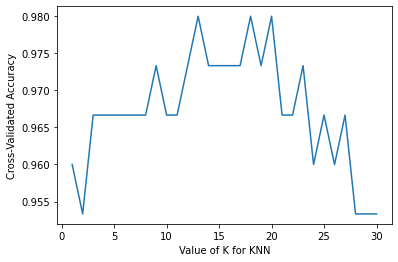

In [25]:
#how to choose n_neighbors number#
import matplotlib.pyplot as plt
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k) #compare which k is the best
    scores = cross_val_score(knn,X,Y,cv=10, scoring="accuracy") #for classification #change knn to compare models
    k_scores.append(scores.mean())
    #loss = - cross_val_score(knn,X,Y,cv=10,scoring="neg_mean_squared_error")  #for regression #-
    #k_scores.append(loss.mean())

plt.plot(k_range,k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.show

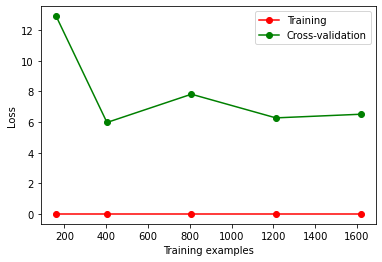

In [28]:
###Overfitting problem

from sklearn.model_selection import  learning_curve #可视化学习的过程
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()
X = digits.data
y = digits.target
train_sizes, train_loss, test_loss= learning_curve(
        SVC(gamma=0.01), X, y, cv=10, scoring='neg_mean_squared_error',
        train_sizes=[0.1, 0.25, 0.5, 0.75, 1])  #gamma=0.001
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

plt.plot(train_sizes, train_loss_mean, 'o-', color="r",
             label="Training") #training data 误差挺小的
plt.plot(train_sizes, test_loss_mean, 'o-', color="g",
             label="Cross-validation") #cross validation的误差曲线，随training set increase而减小

plt.xlabel("Training examples")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

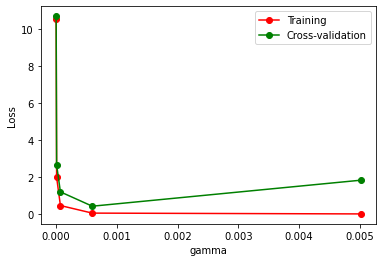

In [29]:
from sklearn.model_selection import  validation_curve

digits = load_digits()
X = digits.data
y = digits.target
param_range = np.logspace(-6, -2.3, 5) #取五个点
train_loss, test_loss = validation_curve(
        SVC(), X, y, param_name='gamma', param_range=param_range, cv=10,
        scoring='neg_mean_squared_error')
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

plt.plot(param_range, train_loss_mean, 'o-', color="r",
             label="Training")
plt.plot(param_range, test_loss_mean, 'o-', color="g",
             label="Cross-validation")

plt.xlabel("gamma")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show() #while gamma larger than around 0.0006, test error increase, which means overfitting happens

In [49]:
###Save

from sklearn import svm
from sklearn import datasets

clf = svm.SVC() #classifier
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf.fit(X, y)

# method 1: pickle
import pickle
# save
filename = 'clf_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [61]:
# restore
loaded_model = pickle.load(open(filename, 'rb'))
print(loaded_model.predict(X[0:1]))

[0]


In [54]:
# method 2: joblib
import joblib
# Save
filename1 = 'finalized_model.sav'
joblib.dump(clf, filename1)
# restore
clf3 = joblib.load(filename1)
print(clf3.predict(X[0:1]))  #joblib 运用多进程，比pickle快

[0]
